# **SMS Spam Classification**

The followings are the main steps required to develop the classification system:

1.Reading dataset

2.Exploratory data analysis

3.Text preprocessing

4.Preparing the dataset

5.Classification model development

6.Performance evaluation

7.Error analysis


# **Step 1: Reading Dataset**

The dataset contains sms messages with labels; spam and ham



In [1]:
# Libraries needed to read the files
import pandas as pd

# Reading the dataset 
dataset = pd.read_csv("spam.csv", encoding='utf_8')

# Viewing the data to check its format
dataset.head()

,v1,v2
0,لعيون الغالية تخفيضات حتى 35% يوم الجمعة 20/3 ...,spam
1,مع بيكوفي رمضان تخفيضات تبدأمن7%وتصل حتي 15%عل...,spam
2,لضمان تفوقك احرص علي مراجعات التركيز النهائيه ...,spam
3,لحدي المحاضرة السادسة,ham
4,والميدتيرم حيكون لحد لكشر كم؟,ham


In [2]:
#Gives a describtive names for the data
dataset=dataset.rename(columns={"v2":"label","v1":"sms"})
dataset.head()

,sms,label
0,لعيون الغالية تخفيضات حتى 35% يوم الجمعة 20/3 ...,spam
1,مع بيكوفي رمضان تخفيضات تبدأمن7%وتصل حتي 15%عل...,spam
2,لضمان تفوقك احرص علي مراجعات التركيز النهائيه ...,spam
3,لحدي المحاضرة السادسة,ham
4,والميدتيرم حيكون لحد لكشر كم؟,ham


**The distribution of the data:**

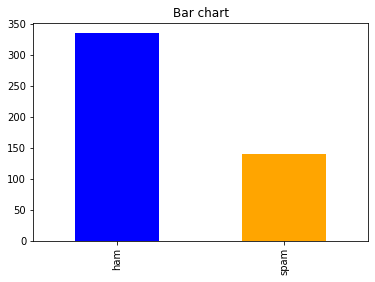

In [3]:
import matplotlib.pyplot as plt
count_Class= pd.value_counts(dataset['label'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title("Bar chart")
plt.show()

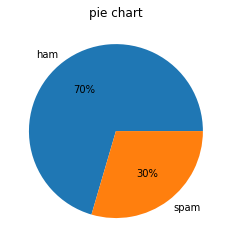

In [4]:
import matplotlib.pyplot as plt
count_Class.plot(kind= 'pie', autopct='%1.0f%%')
plt.title("pie chart")
plt.ylabel('')
plt.show()

# **Step 2: Exploratory Data Analysis**

In this step, we will analyze the data to better understand its content. The following tasks are included in this step:

1.Counting the number of words per message.

2.Counting the number of characters per message.

3.The average number of characters per message.

4.Counting the number of stop words per message.

5.Overall dataset statistics.


In [5]:
# Required libraries
import nltk
nltk.download('stopwords') #from nltk.corpus import stopwords
stop = set(nltk.corpus.stopwords.words("arabic"))

# Text length analysis 
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))


dataset['word_count'] = dataset['sms'].apply(lambda x: len(str(x).split(" ")))
dataset['char_count'] = dataset['sms'].str.len() ## this also includes spaces
dataset['avg_char_per_word'] = dataset['sms'].apply(lambda x: avg_word(x))
#stop = stopwords.words('arabic')
dataset['stopwords'] = dataset['sms'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset = dataset.sort_values(by='word_count',ascending=[0])
dataset.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sms,label,word_count,char_count,avg_char_per_word,stopwords
96,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...,ham,66,410,5.227273,6
291,عميلنا العزيز .. الان نقدم لك عبر تطبيق بنكك م...,spam,50,293,4.840000,6
146,تعلن كلية الافق عن وجود فرص في تخصصات الطب تم...,spam,46,257,5.047619,2
237,مع باقات زين الشير الجديدة، حتحتار وإنت بتختا...,spam,45,234,4.523810,10
257,عزيزي مشترك سوداني، اشترك في باقة الاتصال العا...,spam,42,267,5.380952,6


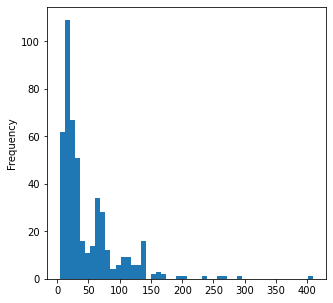

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset['char_count'].plot(bins=50, kind='hist', figsize=(5,5) )

In [7]:
# Overall averages of each numeric column 
dataset_stat = dataset.mean(axis=0)
dataset_stat

<ipython-input-7-275e536a638a>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_stat = dataset.mean(axis=0)


word_count            8.345992
char_count           47.181435
avg_char_per_word     4.690919
stopwords             1.240506
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f72c6785850>,
      dtype=object)

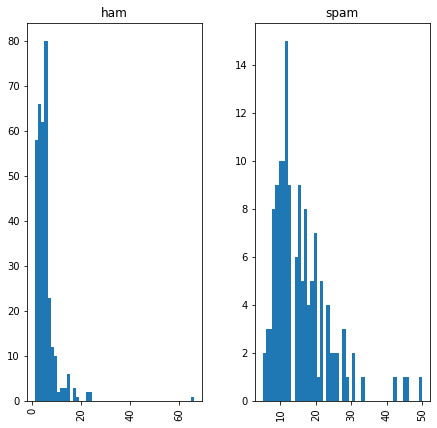

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset.hist(column='word_count', by='label', bins=50, figsize=(7,7) )

In [ ]:
#This code for saving the current version of our data whenever we want
# to download the dataset
from google.colab import files

dataset.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

ModuleNotFoundError: No module named 'google.colab'

From the manual inspection, we will select the preprocessing techniques that better fit our task and dataset.




# **Step 3: Text Preprocessing**

We perform basic text preprocessing steps including the following:

1.Stop words removal

2.Normalization

3.Removing punctuations

4.Noise removal


**Stop Words Removal:**

In [9]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))

def stopRemoval(text):
    tempsms = word_tokenize(text)
    text = " ".join([w for w in tempsms if not w in stop and len(w) >= 2])
    return text

dataset['noStop_sms'] = dataset['sms'].apply(lambda x:stopRemoval(x))
#dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Normalization:**

In [10]:
# Required libraries
import re

def normalize(text):
    # remove three or more repetitions of any character
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text=pattern.sub(r"\1\1", text)
    # normalize alif
    text = text.replace(u"\u0625", u"\u0627")  # HAMZA below, with LETTER ALEF
    #text = text.replace(u"\u0621", u"\u0627")  # HAMZA, with LETTER ALEF
    text = text.replace(u"\u0622", u"\u0627")  # ALEF WITH MADDA ABOVE, with LETTER ALEF
    text = text.replace(u"\u0623", u"\u0627")  # ALEF WITH HAMZA ABOVE, with LETTER ALEF
    # normalize taa
    text=text.replace(u"\u0629", u"\u0647") # taa' marbuuTa, with haa'
    # normalize yaa
    text = text.replace(u"\u064A", u"\u0649")  # yaa' with 'alif maqSuura
    # remove diacritics 
    text = text.replace(u"\u064B", "")  # fatHatayn
    text = text.replace(u"\u064C", "")  # Dammatayn
    text = text.replace(u"\u064D", "")  # kasratayn
    text = text.replace(u"\u064E", "")  # fatHa
    text = text.replace(u"\u064F", "")  # Damma
    text = text.replace(u"\u0650", "")  # kasra
    text = text.replace(u"\u0651", "")  # shaddah
    text = text.replace(u"\u0652", "")  # sukuun
    text = text.replace(u"\u0670", "`")  # dagger 'alif
    
    #Normalize the equivalent weighting words                                             .

    text = text.replace("بالاتصال", "الاتصال")
    text = text.replace("اوالاتصال", "الاتصال")
    text = text.replace("والاتصال", "الاتصال")
    text = text.replace("للاتصال", "الاتصال")
    text = text.replace("وللاتصال", "الاتصال")
    text = text.replace("الاتصال", "الاتصال")
    text = text.replace("للتواصل", "الاتصال")
    text = text.replace("للاستفسار", "الاتصال")
    text = text.replace("وللاستفسار", "الاتصال")
    text = text.replace("تخفيضات", "تخفيض")
    text = text.replace("مخفضه", "تخفيض")
    text = text.replace("لتخفيض", "تخفيض")
    text = text.replace("التخفيضات", "تخفيض")
    text = text.replace("والتخفيضات", "تخفيض")
    text = text.replace("مشترك", "اشترك")
    text = text.replace("للاشترك", "اشترك")
    text = text.replace("وللاشترك", "اشترك")
    text = text.replace("المشترك", "اشترك")
    text = text.replace("اقساط", "قسط")
    text = text.replace("بالاقساط", "قسط")
    text = text.replace("واقساط", "قسط")
    text = text.replace("لضمان", "ضمان")
    text = text.replace("الضمان", "ضمان")
    text = text.replace("استثماريه", "استثمر")
    text = text.replace("واستثماريه", "استثمر")
    text = text.replace("عروضنا", "عروض")
    text = text.replace("العرض", "عروض")
    text = text.replace("العروض", "عروض")
    text = text.replace("والعروض", "عروض")
    text = text.replace("بعروض", "عروض")
    text = text.replace("مجانى", "مجانا")
    text = text.replace("مجانية", "مجانا")
    text = text.replace("المجانية", "مجانا")
    text = text.replace("حصرية", "حصريا")
    text = text.replace("الروابط", "رابط")
    text = text.replace("روابط", "رابط")
    return text

dataset['normalized_sms'] = dataset['sms'].apply(lambda x: normalize(x))

# aggregate all preprocessing steps into one column for the next step
dataset['text'] = dataset['noStop_sms'].apply(lambda x:normalize(x))

dataset.head()
dataset[['sms', 'label', 'normalized_sms']].sample(5)

,sms,label,normalized_sms
81,اية وين,ham,اىه وىن
246,عفوا رقم الهاتف مسجل مسبقا,ham,عفوا رقم الهاتف مسجل مسبقا
441,التقديم كان ساهل وما فيهو حاجة,ham,التقدىم كان ساهل وما فىهو حاجه
45,من سوداني تمتع بأفضل الألعاب عبر منصات الألعاب...,spam,من سودانى تمتع بافضل الالعاب عبر منصات الالعاب...
333,حبوبتي اتوفت امس,ham,حبوبتى اتوفت امس


**Removing Punctuations:**

In [11]:
# Required libraries
import string 
import re

arabicPunctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"] # defining customized punctuation marks
englishPunctuations = string.punctuation # importing English punctuation marks
englishPunctuations = [word.strip() for word in englishPunctuations] # converting the English punctuation from a string to array for processing
punctuationsList = arabicPunctuations + englishPunctuations # creating a list of all punctuation marks

def removingPunctuation(text):
  cleanTweet = ''
  for i in text:
    if i not in arabicPunctuations:
      cleanTweet = cleanTweet + '' + i 
  return cleanTweet

dataset['noPunc_sms'] = dataset['sms'].apply(lambda x: removingPunctuation(x))
dataset['text'] = dataset['text'].apply(lambda x: removingPunctuation(x))


#dataset.sample(5)

,sms,label,word_count,char_count,avg_char_per_word,stopwords,noStop_sms,normalized_sms,text,noPunc_sms
432,غريبة ولا متفردة؟,ham,3,17,5.000000,1,غريبة متفردة؟,غرىبه ولا متفرده؟,غرىبه متفرده,غريبة ولا متفردة
44,"اشترك في باقة 15GB الشهرية فقط ب4,412.42 جنيه ...",spam,15,91,5.133333,3,"اشترك باقة 15GB الشهرية فقط ب4,412.42 واستمتع ...","اشترك فى باقه 15GB الشهرىه فقط ب4,412.42 جنىه ...",اشترك باقه 15GB الشهرىه فقط ب441242 واستمتع با...,اشترك في باقة 15GB الشهرية فقط ب441242 جنيه وا...
170,تخفيضات حتى 20٪ لست الحبايب يوم 19 مارس بمعرضن...,spam,19,106,4.631579,4,تخفيضات 20٪ الحبايب يوم 19 بمعرضنا المتحرك ويو...,تخفىضات حتى 20٪ لست الحباىب ىوم 19 مارس بمعرضن...,تخفىضات 20٪ الحباىب ىوم 19 بمعرضنا المتحرك وىو...,تخفيضات حتى 20٪ لست الحبايب يوم 19 مارس بمعرضن...
328,يوم الخميس ان شاء الله,ham,5,22,3.600000,0,يوم الخميس ان شاء الله,ىوم الخمىس ان شاء الله,ىوم الخمىس ان شاء الله,يوم الخميس ان شاء الله
110,"جديدنا بلون هويتنا, دهان زيتي بلون برتقالي قيا...",spam,12,66,4.583333,0,جديدنا بلون هويتنا دهان زيتي بلون برتقالي قياس...,"جدىدنا بلون هوىتنا, دهان زىتى بلون برتقالى قىا...",جدىدنا بلون هوىتنا دهان زىتى بلون برتقالى قىاس...,جديدنا بلون هويتنا دهان زيتي بلون برتقالي قياس...


**Noise removal:**
Noise includes miscellaneous items any content that might be redundant or not important to the task we are performing. In this example, removing digits and extra spaces were included.

In [12]:
def clean(text):
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    # Remove numbers
    text = re.sub("\d+", " ", text)
    return text

dataset['clean_sms'] = dataset['sms'].apply(lambda x:clean(x))
dataset['text'] = dataset['text'].apply(lambda x:clean(x))


#dataset.sample(5)

In [ ]:
from google.colab import files

dataset.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

ModuleNotFoundError: No module named 'google.colab'

# **Step 4: Preparing the Dataset**
In this step, the dataset will be splitted into a train set to develop the classifier and a test set to evaluate and test the classifier. It is always better to have a validation set, which help to adjust the parameters and setting of the experiments to boost the performance. However, for the purpose of this workshop, we will only have two sets; train and test.

In [13]:
# convert labels from categorical to numeric
dataset.loc[:,'label']=dataset.label.map({'ham':0, 'spam':1})
#dataset.head()

**Shuffle the dataset to reduce bias**

In [14]:
# shuffle will help to reduce bias
from sklearn.utils import shuffle
dataset = shuffle(dataset, random_state=42)


**Spliting the** **data**

In [ ]:
# from sklearn.model_selection import train_test_split

#  # 20% test set and 80% train set
# train, test = train_test_split(dataset, test_size=0.2,stratify=dataset.label,random_state=42)
# train


**Ensuring the combatibility of the dataset, training dataset and testing dataset.**

It is important to make sure that all sets have similar distribution of classes 

In [ ]:
# x_train= train.text
# y_train= train.label
# x_test= train.text
# y_test= train.label

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# #The whole dataset
# sns.countplot(dataset.iloc[:,1])
# plt.xlabel('Classes')
# plt.ylabel('Number of occurrences')
# plt.show()

# #Training dataset
# sns.countplot(train.iloc[:,1])
# plt.xlabel('Classes')
# plt.ylabel('Number of occurrences')
# plt.show()

# #Testing dataset
# sns.countplot(test.iloc[:,1])
# plt.xlabel('Classes')
# plt.ylabel('Number of occurrences')
# plt.show()

**Feature extraction:**

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer # converts text data to matrix of token counts.
 
# cv = CountVectorizer()

# x_train= cv.fit_transform(x_train)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer # converts text data to matrix of token counts.
 
cv = CountVectorizer()
dataset_words = cv.fit_transform(dataset['text'])

It is important to make sure that all sets have similar distribution of classes as it the case in this example. We will also need to convert the labels from categorical type to numeric type.

We only need the fully preprocessed text and the numeric label to be passed to the next step.

# **Step 5: Classification Model Development**
During this step, the classifier is created using the training set and is used to predict the labels of the testing set. For the purpose of this workshop, we only develop one traditional machine learning classifier, which is the logistic regression.

**Create a classification pipeline**

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [17]:
#An Array to save the predictions to calculate the metrics later
preds = pd.DataFrame(index=dataset.index).reset_index(drop=True)

#### Multinomial Naive Bayes

In [18]:
model = MultinomialNB()

In [19]:

print('Validating...')

X = dataset_words.copy()
y = dataset['label'].values

for train_index, test_index in StratifiedKFold(n_splits=5).split(X, y):
    
    X_Train, X_Test = X[train_index], X[test_index]
    y_Train, y_Test = y[train_index], y[test_index]
    
    model.fit(X_Train,y_Train)
    y_pred = model.predict(X_Test)
    
    preds.loc[test_index,'NB'] = y_pred.copy()  # Store The Predictions to calucalate the metrics
    
    
print('Finished!!!') 

Validating...
Finished!!!


# **Step 6: Performance Evaluation**

### Multinomal Naive Bayes

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y, preds['NB'])) )
print("Precision score: {}". format(precision_score(y, preds['NB'])) )
print("Recall score: {}". format(recall_score(y, preds['NB'])))
print("F1 score: {}". format(f1_score(y, preds['NB'])))

print(classification_report(y, preds['NB']))
print(confusion_matrix(y, preds['NB']))

#print accuracy score
print('accuracy_score= %',accuracy_score(y, preds['NB'])*100)
     

Multinomial NB
Accuracy score: 0.9345991561181435
Precision score: 0.9291338582677166
Recall score: 0.8428571428571429
F1 score: 0.8838951310861423
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       334
           1       0.93      0.84      0.88       140

    accuracy                           0.93       474
   macro avg       0.93      0.91      0.92       474
weighted avg       0.93      0.93      0.93       474

[[325   9]
 [ 22 118]]
accuracy_score= % 93.45991561181435


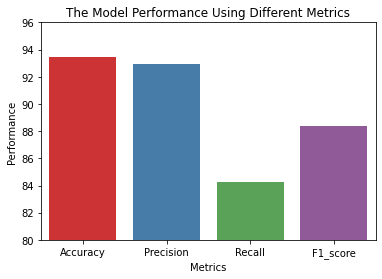

In [21]:
results = {"Accuracy": accuracy_score(y, preds['NB'])*100, 'Precision': precision_score(y, preds['NB'])*100, 'Recall': recall_score(y, preds['NB'])*100, 'F1_score': f1_score(y, preds['NB'])*100} 
sns.barplot( x=list(results.keys()), y=list(results.values()),  palette="Set1");
plt.ylim((80,96))

plt.xlabel("Metrics")
plt.ylabel("Performance")
plt.title("The Model Performance Using Different Metrics")
plt.show()

**Confusion matrix**

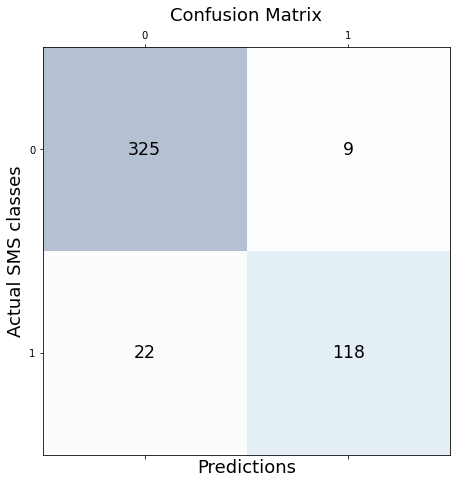

In [22]:
conf_matrix = confusion_matrix(y, preds['NB'])
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual SMS classes', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()